<a href="https://colab.research.google.com/github/Francisco-Dougllas/03_SQL_Data_Science/blob/main/2_1_Python_Com_SQL_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL & PANDAS I

**Versão do Python**

In [ ]:
from platform import python_version
print('Versão do Python', python_version())

Versão do Python 3.9.12


**Importação das Bibliotecas Necessarias**

In [ ]:
import pandas as pd
import numpy as np
import sqlite3

## Banco de Dados SQLite com Python

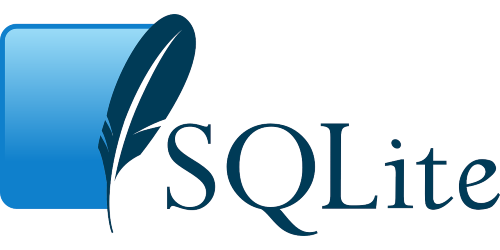

In [ ]:
from IPython.display import Image
Image('dados/sql.png')

#### Iremos utiliza o banco de dados da **Olist** 

Fonte: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?resource=download

        O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Suas funcionalidades permitem visualizar um pedido a partir de múltiplas dimensões: desde o status do pedido, preço, pagamento e desempenho do frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes.

### Iremos Fazer a importação de todas as bases de dados e transformalas em um unico arquivo db formato do SQL

**Caso o Banco de Dados Ja Exista demvemos apaga o mesmo**

In [ ]:
!del "dados_olist.db"

**Criando a Conexão com o banco de dados SQLite**

            Observe que quando eu faço a conexão, automaticamente o SQLite cria um novo arquivo do tipo (db)

In [ ]:
conect = sqlite3.connect('dados_olist.db')

**Importando as Bases de Dados da Olist**

In [ ]:
customer      = pd.read_csv('archive/olist_customers_dataset.csv')
geolocation   = pd.read_csv('archive/olist_geolocation_dataset.csv')
order_items   = pd.read_csv('archive/olist_order_items_dataset.csv')
payments      = pd.read_csv('archive/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv')
orders        = pd.read_csv('archive/olist_orders_dataset.csv')
products      = pd.read_csv('archive/olist_products_dataset.csv')
sellers       = pd.read_csv('archive/olist_sellers_dataset.csv')
category      = pd.read_csv('archive/product_category_name_translation.csv')

**Analisando o Shape de Cada Dataframe**

In [ ]:
print('Customer:_________ ', customer.shape)
print('Geolocation:______ ', geolocation.shape)
print('Order_items:______ ', order_items.shape)
print('Payments:_________ ', payments.shape)
print('Order_reviews:____ ', order_reviews.shape)
print('Orders:___________ ', orders.shape)
print('Products:_________ ', products.shape)
print('Category:_________ ', category.shape)

Customer:_________  (99441, 5)
Geolocation:______  (1000163, 5)
Order_items:______  (112650, 7)
Payments:_________  (103886, 5)
Order_reviews:____  (99224, 7)
Orders:___________  (99441, 8)
Products:_________  (32951, 9)
Category:_________  (71, 2)


**Copiando os Dataframes para dentro do Banco de Dados como tabelas**

In [ ]:
customer.to_sql     ('Customer', conect)
geolocation.to_sql  ('Geolocation', conect)
order_items.to_sql  ('Order_items', conect)
payments.to_sql     ('Payments', conect)
order_reviews.to_sql('Order_reviews', conect)
orders.to_sql       ('Orders', conect)
products.to_sql     ('Products', conect)
category.to_sql     ('Category', conect)

71

**Carregando a Extensão SQLite**

In [ ]:
%load_ext sql

**Agora Definimos o Banco de Dados a Ser Utilizado**

In [ ]:
%sql sqlite:///dados_olist.db

### Depois de definir o Banco de Dados Executaremos Consultas SQL Utilizando o Pandas

#### <font color='blue'>Observação: Para que o Notebook não fique tão extenso, utilizarei um limite de apenas 5 a 15 Linhas Para Visualização dos Dados</font>

#### Para realiza as consultas sempre utilize %%sql

In [ ]:
%%sql

-- Selecione Para Mim tudo da Coluna Orders e mostre-me apenas as 15 primeiras linhas

SELECT *
FROM ORDERS
LIMIT 15

-- Observação no SQL, tanto faz eu usa Maiusculas como minusculas

 * sqlite:///dados_olist.db
Done.


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [ ]:
%%sql

-- Selecione para mim todos os registros da tabela Category e mostre-me apenas as 10 primeiras linhas

select *
from category
limit 10

-- Perceba que eu utilizo tudo em minusculas mas vamos utiliza os comandos em maiusculas e iremos
-- chama as colunas e variaveis em minusculas

 * sqlite:///dados_olist.db
Done.


index,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [ ]:
%%sql

-- Selecione para mim todos os registros da tabela Customer e mostre-me apenas as 10 primeiras linhas

SELECT *
FROM customer
LIMIT 10

 * sqlite:///dados_olist.db
Done.


index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


-
-
-
-

## A partir desse ponto:

**irei utiliza os comentarios de pesquisa fora da celula do SQL para deixa um pouco mais elegante**

**<font color='blue'>Selecione para mim todos os registros da tabela Order_items e mostre-me apenas as 5 primeiras linhas**

In [ ]:
%%sql

SELECT *
FROM order_items
LIMIT 5

 * sqlite:///dados_olist.db
Done.


index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14


**<font color='blue'>Selecione todos os registros da tabela Orders e exiba apenas as colunas Order_Id e Order_Status**

In [ ]:
%%sql

SELECT order_id, order_status
FROM orders
LIMIT 10

 * sqlite:///dados_olist.db
Done.


order_id,order_status
e481f51cbdc54678b7cc49136f2d6af7,delivered
53cdb2fc8bc7dce0b6741e2150273451,delivered
47770eb9100c2d0c44946d9cf07ec65d,delivered
949d5b44dbf5de918fe9c16f97b45f8a,delivered
ad21c59c0840e6cb83a9ceb5573f8159,delivered
a4591c265e18cb1dcee52889e2d8acc3,delivered
136cce7faa42fdb2cefd53fdc79a6098,invoiced
6514b8ad8028c9f2cc2374ded245783f,delivered
76c6e866289321a7c93b82b54852dc33,delivered
e69bfb5eb88e0ed6a785585b27e16dbf,delivered


**<font color='blue'>Selecione para mim todos os registros da tabela orders exibindo apenas as colunas Order_id, Order_status e Customer_id**

In [ ]:
%%sql

SELECT order_id,
       order_status,
       customer_id
        
FROM orders
LIMIT 5

 * sqlite:///dados_olist.db
Done.


order_id,order_status,customer_id
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c


### **<font color='blue'>Trabalhando Com ALIAS**
ALIAS são apelidos, são os nomes temporários dados a tabela 

In [ ]:
%%sql

SELECT order_id AS 'Id_Pedido',
        order_status AS 'Status_Pediso'
        ,customer_id AS 'Id_do_Cliente'
        
FROM orders
LIMIT 10

 * sqlite:///dados_olist.db
Done.


Id_Pedido,Status_Pediso,Id_do_Cliente
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d


**<font color='blue'>Selecione Apenas Linhas Unicas da Coluna Orders**

In [ ]:
%%sql

SELECT DISTINCT order_id AS 'ID_Pedido',
                    order_status AS 'Status_Pedido',
                    customer_id AS 'ID_do_Cliente'
        
FROM orders
LIMIT 10

 * sqlite:///dados_olist.db
Done.


ID_Pedido,Status_Pedido,ID_do_Cliente
e481f51cbdc54678b7cc49136f2d6af7,delivered,9ef432eb6251297304e76186b10a928d
53cdb2fc8bc7dce0b6741e2150273451,delivered,b0830fb4747a6c6d20dea0b8c802d7ef
47770eb9100c2d0c44946d9cf07ec65d,delivered,41ce2a54c0b03bf3443c3d931a367089
949d5b44dbf5de918fe9c16f97b45f8a,delivered,f88197465ea7920adcdbec7375364d82
ad21c59c0840e6cb83a9ceb5573f8159,delivered,8ab97904e6daea8866dbdbc4fb7aad2c
a4591c265e18cb1dcee52889e2d8acc3,delivered,503740e9ca751ccdda7ba28e9ab8f608
136cce7faa42fdb2cefd53fdc79a6098,invoiced,ed0271e0b7da060a393796590e7b737a
6514b8ad8028c9f2cc2374ded245783f,delivered,9bdf08b4b3b52b5526ff42d37d47f222
76c6e866289321a7c93b82b54852dc33,delivered,f54a9f0e6b351c431402b8461ea51999
e69bfb5eb88e0ed6a785585b27e16dbf,delivered,31ad1d1b63eb9962463f764d4e6e0c9d


**<font color='blue'>Conte a quantidade de Registros retornados pela consulta**

In [ ]:
%%sql

SELECT COUNT(*)
FROM orders

 * sqlite:///dados_olist.db
Done.


COUNT(*)
99441


**<font color='blue'>Dando um apelido ao resultado retornado**

In [ ]:
%%sql

SELECT COUNT(*) AS 'Quantidade_de_Linhas'
FROM orders

 * sqlite:///dados_olist.db
Done.


Quantidade_de_Linhas
99441


**<font color='blue'>Contando a Quantidade de linhas não nulas da coluna customer_id e dando um apelido ao resultado retornado**

In [ ]:
%%sql

SELECT COUNT(customer_id) AS 'Quantidade de Clientes'
FROM orders

 * sqlite:///dados_olist.db
Done.


Quantidade de Clientes
99441


### Trabalhando com a opção WHERE

**<font color='blue'>Selecione tudo para mim da coluna orders onde o status do pedido seja = a delivered**

In [ ]:
%%sql

SELECT *
FROM orders
WHERE order_status = 'delivered'
LIMIT 10

 * sqlite:///dados_olist.db
Done.


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00


**<font color='blue'>Conte para mim todos os registros com o status 'delivered'**

In [ ]:
%%sql

SELECT COUNT(*)
FROM orders
WHERE order_status = 'delivered'

 * sqlite:///dados_olist.db
Done.


COUNT(*)
96478


**<font color='blue'>Conte para mim todos os registros com o status diferente de 'delivered'**

In [ ]:
%%sql

SELECT COUNT(*)
FROM orders
WHERE order_status != 'delivered'

 * sqlite:///dados_olist.db
Done.


COUNT(*)
2963


**<font color='blue'>Selecione todas as linhas da tabela orders com o status diferente de 'delivered' e que não tenha pedidos aprovados**

In [ ]:
%%sql

SELECT *
FROM orders
WHERE order_status != 'delivered'
AND order_approved_at IS NULL
LIMIT 10

 * sqlite:///dados_olist.db
Done.


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,None,None,None,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,None,None,None,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,None,None,None,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,None,None,None,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,None,None,None,2017-05-30 00:00:00
3056,ddaec6fff982b13e7e048b627a11d6da,68f4ad79cc0c2ad06e19088f5c00e9fa,canceled,2016-10-04 19:41:32,None,None,None,2016-11-16 00:00:00
3094,5290c34bd38a8a095b885f13958db1e1,92af427e290117f39d9ff908566072e0,canceled,2018-08-21 10:25:18,None,None,None,2018-09-06 00:00:00
3684,03310aa823a66056268a3bab36e827fb,25dbbf0c477fd4ae0880aaffbb12e8b3,canceled,2018-08-07 16:33:59,None,None,None,2018-09-04 00:00:00
4373,4c8b9947280829d0a8b7e81cc249b875,403c35c4d8813bf67b3d396b91ca1619,canceled,2018-08-09 14:54:47,None,None,None,2018-08-21 00:00:00
4939,b13ea375fe9c728832688264638f84cf,0dc5884bc5ffba283678229f27e07ff9,canceled,2018-08-22 18:52:29,None,None,None,2018-09-19 00:00:00


**<font color='blue'>Selecione para mim todas as linhas da tabela orders com o status diferentes de 'delivered' ou que não tenham pedidos aprovados**

In [ ]:
%%sql

SELECT *
FROM orders
WHERE order_status != 'delivered'
OR order_approved_at IS NULL
LIMIT 10

 * sqlite:///dados_olist.db
Done.


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,None,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,None,None,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,None,None,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,None,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,None,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,None,2017-12-13 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,None,None,2017-12-05 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,None,2018-08-03 00:00:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,None,2018-03-23 00:00:00


**<font color='blue'>Selecione para mim todos os clientes cuja a cidade começa com Mogi**

In [ ]:
%%sql

SELECT *
FROM customer
WHERE customer_city LIKE 'mogi%'
LIMIT 7

 * sqlite:///dados_olist.db
Done.


index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
105,4cc465bb8ccb079ba561852ffa794668,7981196c7252350915beb9a7367d40b2,8743,mogi das cruzes,SP
435,2122031cd11c82d905572a7958c2a117,4a362420541051d3d4055a777681ccbe,13843,mogi-guacu,SP
682,0b169717fec8c12a53790ce862ee480c,25e1b5240ae610b163924a49e7e85bc6,13845,mogi-guacu,SP
706,22a3b0e62211d8e0e28e374ce3cb6041,3f9d987156fddc08ef77f52d1a15c073,13840,mogi-guacu,SP
914,edaa9852dc9c501799d0062442a05a52,7be63f0ed4d9c76ed55844021da8d5e5,8830,mogi das cruzes,SP
1153,cf013fcd49b67549a3f482afb2a533ac,4350cf84c81dc8d0fed2aaf06c683d9a,8720,mogi das cruzes,SP


**<font color='blue'>Selecione para mim todos os clientes cuja a cidade não começa com mogi**

In [ ]:
%%sql

SELECT *
FROM customer
WHERE customer_city NOT LIKE 'mogi%'
LIMIT 7

 * sqlite:///dados_olist.db
Done.


index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG


**<font color='blue'>Conte para mim a quantidade de linhas agrupando os resultados pelo Id_do_Cliente**

In [ ]:
%%sql

SELECT *
FROM orders
GROUP BY customer_id
LIMIT 10

 * sqlite:///dados_olist.db
Done.


index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
68578,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00
10013,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00
65884,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00
43174,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00
5888,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00
73652,cd3558a10d854487b4f907e9b326a4fc,0004164d20a9e969af783496f3408652,delivered,2017-04-12 08:35:12,2017-04-12 08:50:12,2017-04-12 17:05:42,2017-04-20 16:12:26,2017-05-04 00:00:00
46156,07f6c3baf9ac86865b60f640c4f923c6,000419c5494106c306a97b5635748086,delivered,2018-03-02 17:47:40,2018-03-03 14:10:38,2018-03-07 21:07:51,2018-04-17 17:17:34,2018-03-22 00:00:00
59978,8c3d752c5c02227878fae49aeaddbfd7,00046a560d407e99b969756e0b10f282,delivered,2017-12-18 11:08:30,2017-12-18 12:45:31,2017-12-18 20:55:54,2017-12-26 20:58:33,2018-01-12 00:00:00
79246,fa906f338cee30a984d0945b3832e431,00050bf6e01e69d5c0fd612f1bcfb69c,delivered,2017-09-17 16:04:44,2017-09-17 16:15:13,2017-09-18 21:02:46,2017-10-02 21:14:31,2017-10-13 00:00:00
80371,9b961b894e797f63622137ff7eb1c1af,000598caf2ef4117407665ac33275130,delivered,2018-08-11 12:14:35,2018-08-11 12:25:08,2018-08-13 14:41:00,2018-08-20 18:18:41,2018-09-06 00:00:00


-
-
-
-

### Começando a Subir o Nivel das Consultas SQL

**<font color='blue'>Some para mim a quantidade de valor gasto por tipo de pagamento**

In [ ]:
%%sql

SELECT payment_type, SUM(payment_value)
FROM payments
GROUP BY payment_type

 * sqlite:///dados_olist.db
Done.


payment_type,SUM(payment_value)
boleto,2869361.2699999753
credit_card,12542084.189999327
debit_card,217989.7900000001
not_defined,0.0
voucher,379436.8700000007


**<font color='blue'>Calcule para mim o valor médio gasto por tipo de pagamento>**

In [ ]:
%%sql

SELECT payment_type, AVG(payment_value)
FROM payments
GROUP BY payment_type

 * sqlite:///dados_olist.db
Done.


payment_type,AVG(payment_value)
boleto,145.0344354023441
credit_card,163.31902063935578
debit_card,142.57017004578162
not_defined,0.0
voucher,65.70335411255424


**<font color='blue'>Calcule para mim o valor mínimo gasto por tipo de pagamento**

In [ ]:
%%sql

SELECT payment_type, MIN(payment_value)
FROM payments
GROUP BY payment_type

 * sqlite:///dados_olist.db
Done.


payment_type,MIN(payment_value)
boleto,11.62
credit_card,0.01
debit_card,13.38
not_defined,0.0
voucher,0.0


**<font color='blue'>Calcule e agrupe para mim o valor maximo gasto por tipo de pagamento**

In [ ]:
%%sql

SELECT payment_type, 
        MAX(payment_value)

FROM payments
GROUP BY payment_type

 * sqlite:///dados_olist.db
Done.


payment_type,MAX(payment_value)
boleto,7274.88
credit_card,13664.08
debit_card,4445.5
not_defined,0.0
voucher,3184.34


**<font color='red'>Utilizando a Clausula HAVING**
    
**<font color='blue'>Calcule e agrupe para mim a soma dos pagamentos aprovados**

In [ ]:
%%sql

SELECT payment_type,
        SUM(payment_value)
FROM payments
GROUP BY payment_type
HAVING payment_type IS NOT NULL

 * sqlite:///dados_olist.db
Done.


payment_type,SUM(payment_value)
boleto,2869361.2699999753
credit_card,12542084.189999327
debit_card,217989.7900000001
not_defined,0.0
voucher,379436.8700000007


**<font color='blue'>Filtrando Resultados com a clausula WHERE**

In [ ]:
%%sql

SELECT PAYMENT_TYPE
        ,SUM(PAYMENT_VALUE)
FROM PAYMENTS
GROUP BY PAYMENT_TYPE
WHERE SUM(PAYMENT_VALUE) > 0
LIMIT 10

-- PERCEBA QUE NESSA FORMA NÃO PODEMOS SELECIONA SEM UM ATRIBUTO PARA ISSO DEVO USA A CLAUSULA HAVING
-- SEMPRE QUE POSSIVEL USE GROUP BY COM HAVING

 * sqlite:///dados_olist.db
(sqlite3.OperationalError) near "WHERE": syntax error
[SQL: SELECT PAYMENT_TYPE
        ,SUM(PAYMENT_VALUE)
FROM PAYMENTS
GROUP BY PAYMENT_TYPE
WHERE SUM(PAYMENT_VALUE) > 0
LIMIT 10

-- PERCEBA QUE NESSA FORMA NÃO PODEMOS SELECIONA SEM UM ATRIBUTO PARA ISSO DEVO USA A CLAUSULA HAVING
-- SEMPRE QUE POSSIVEL USE GROUP BY COM HAVING]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


**<font color='blue'>Filtre para mim apenas os Grupos com valores maiores que 0, utilizando a clausula HAVING**

In [ ]:
%%sql

SELECT payment_type,
        SUM(payment_value)
FROM payments
GROUP BY payment_type
HAVING SUM(payment_value) > 0

 * sqlite:///dados_olist.db
Done.


payment_type,SUM(payment_value)
boleto,2869361.2699999753
credit_card,12542084.189999327
debit_card,217989.7900000001
voucher,379436.8700000007


**<font color='blue'>Ordene para mim em ordem Alfabetica os dados da coluna Customer_Id, por customer_city e customer_state e orderne por customer_city**

In [ ]:
%%sql

SELECT customer_id,
        customer_city,
        customer_state
        
FROM customer
ORDER BY customer_city
LIMIT 20

-- Observação: Não esqueça de coloca o limit pois executei sem o limite e travou tudo
-- Para execução de consultas maiores que 1000 linhas devo utiliza SQLite no proprio pc ou mesmo outro SGBD

 * sqlite:///dados_olist.db
Done.


customer_id,customer_city,customer_state
f11eb8f0b8b87510a93e3e1aa10b0ade,abadia dos dourados,MG
a23e3f9a2b656b23b7e52075964b42cd,abadia dos dourados,MG
9e01f714a2b3b8962c222cf2b74c20dc,abadia dos dourados,MG
576d71ddb21b21763cfedce73b902180,abadiania,GO
5e9e1ae42e02df93e9a591e86fd531a3,abaete,MG
ff0d62f8be4c098e6306f39bc6ebded4,abaete,MG
962b41ee521809e7435fdac0d93063a9,abaete,MG
d47c8bb51df6f716e196ecd6cd5d2c09,abaete,MG
2bf14bf7a1f0610883d264cae6bc4de6,abaete,MG
24d97ea7bb12a40f87d701e17017d282,abaete,MG


**<font color='blue'>Ordene para mim em order Decrescente**

In [ ]:
%%sql

select customer_id,
    customer_city,
    customer_state
    
from customer
order by customer_city desc
limit 15

 * sqlite:///dados_olist.db
Done.


customer_id,customer_city,customer_state
e046f992a304cc92e1b00d7fccdf1c42,zortea,SC
0a466d490a3c2fcc1e7177f4809ec7dd,zortea,SC
1052e334b46dd1e9876946d6372a363e,ze doca,MA
fc87e5c06780700952aa42998a22968f,ze doca,MA
bbabdabac0f425e8c087ec7ed63a7aee,ze doca,MA
a5fef962b76277b1f7be4cd07c6f9ed4,ze doca,MA
d8b3ef6f73de33ae716e94d2478cc080,ze doca,MA
a30fa1104a5ff6f5d9d1d907ffb4c609,zacarias,SP
87ce66add9df2248ba4ee66897a478da,zacarias,SP
ff7920f10be4fe1845f0f029ec67bb9f,xique-xique,BA


**<font color='blue'>Conbinando as clausulas Group By e Order By**

In [ ]:
%%sql

SELECT customer_state AS 'Estado Onde Mora o Cliente',
        COUNT(*) AS 'Quantidade'
    
FROM customer
GROUP BY customer_state
ORDER BY 2 DESC

LIMIT 20

 * sqlite:///dados_olist.db
Done.


Estado Onde Mora o Cliente,Quantidade
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033
GO,2020
